In [17]:
from Movement_functions import *
from Color_functions import *
from skimage import io, measure
from skimage.color import rgb2lab
import matplotlib.pyplot as plt
plt.gray()

<Figure size 640x480 with 0 Axes>

In [6]:
prob_la = np.load("prob_la.npy")
prob_lb = np.load("prob_lb.npy")
prob_ab = np.load("prob_ab.npy")

In [7]:
video_dir = "videos5fps/forest2.avi"

In [8]:
M_t = matriz_de_movimiento(video_dir)

In [9]:
V = video_rgb(video_dir)

### Otsu (sobre componente a)

In [10]:
F_otsu = video_otsu_a(video_dir)

In [11]:
C_Otsu = [M_t[i]&F_otsu[i] for i in range(len(M_t))]

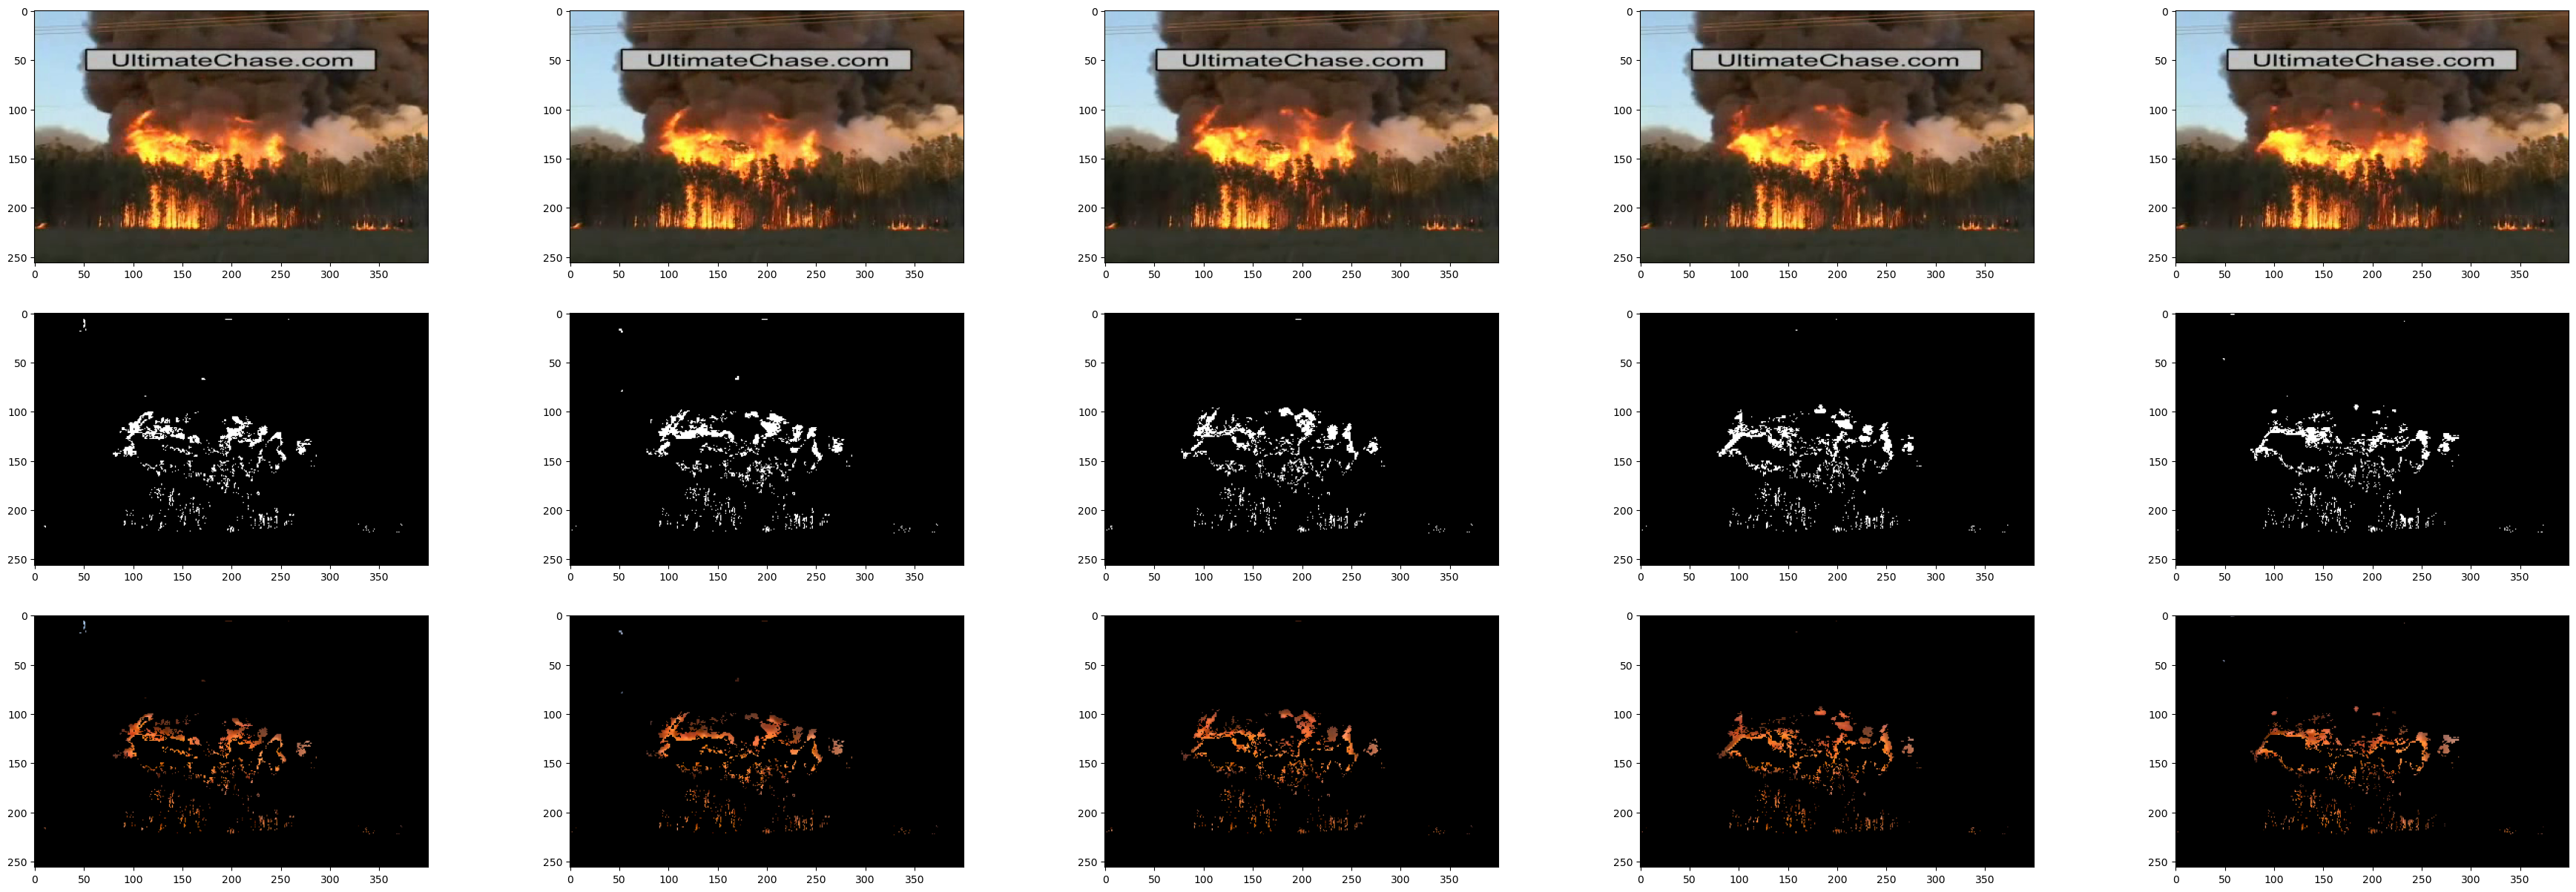

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(45,15))

for i in range(30,35):
    axes[0][i-30].imshow(V[i])
    axes[1][i-30].imshow(C_Otsu[i])
    axes[2][i-30].imshow(V[i]*C_Otsu[i][...,None])

plt.show()

In [13]:
comps_Otsu = componentes_que_crecen(np.array(C_Otsu[:15]), tiempo_buffer=5, min_crecimiento=.4, min_area=10)

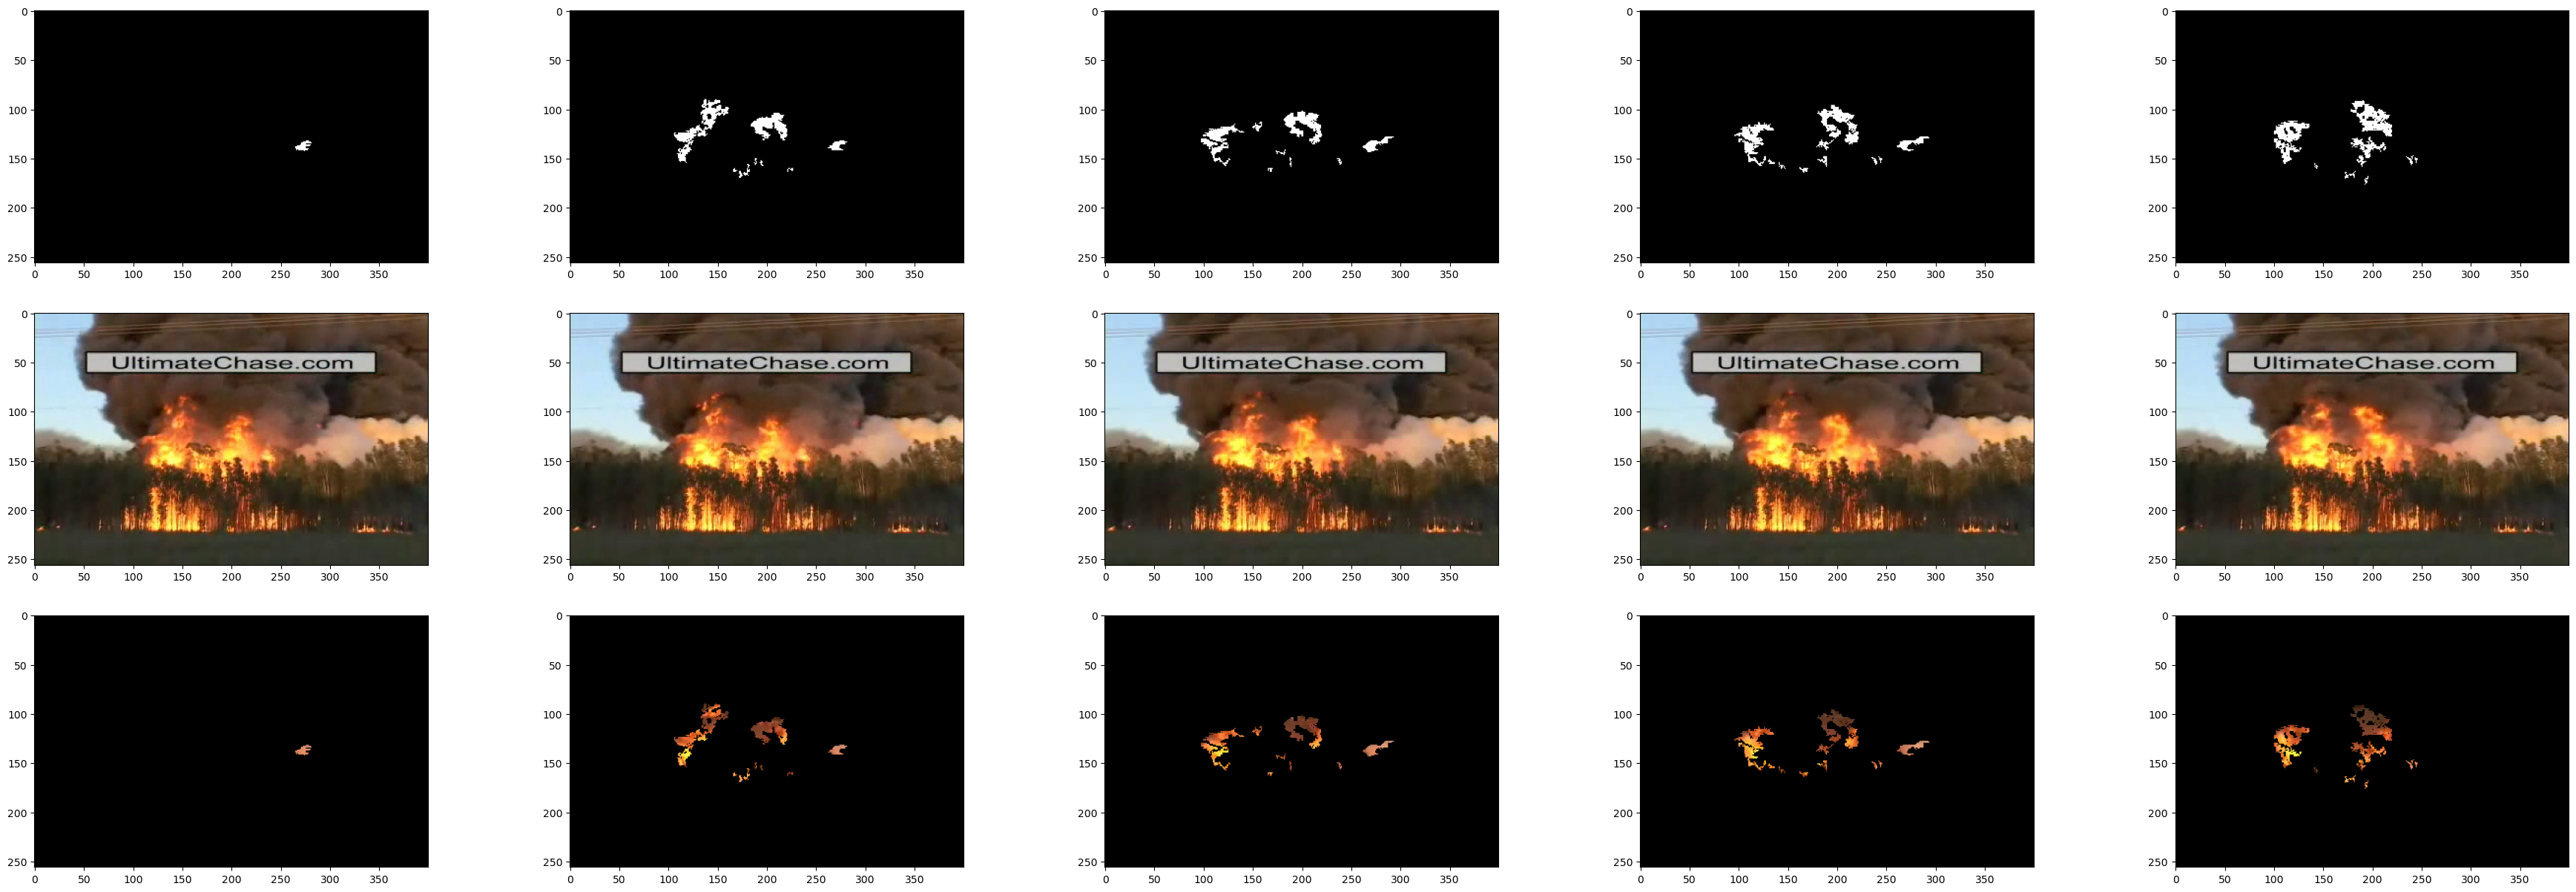

In [14]:
fig, axes = plt.subplots(3, 5, figsize=(45,15))

for i in range(5):
    axes[0][i].imshow(comps_Otsu[5+i])
    axes[1][i].imshow(V[10+i])
    axes[2][i].imshow(comps_Otsu[5+i][...,None] * V[15+i])

### R1 & ... & R5

In [15]:
F_mascaras = video_mascaras_R(video_dir, prob_la, prob_lb, prob_ab)

KeyboardInterrupt: 

In [11]:
C_todasLasMascaras = [M_t[i]&F_mascaras[i][0] for i in range(len(M_t))] # Perdón por este nombre

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(45,15))

for i in range(30,35):
    axes[0][i-30].imshow(V[i])
    axes[1][i-30].imshow(C_todasLasMascaras[i])
    axes[2][i-30].imshow(V[i]*C_todasLasMascaras[i][...,None])

plt.show()

In [13]:
comps_todasLasMascaras = componentes_que_crecen(np.array(C_todasLasMascaras[:15]), tiempo_buffer=5, min_crecimiento=.4, min_area=10)

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(45,15))

for i in range(5):
    axes[0][i].imshow(comps_todasLasMascaras[5+i])
    axes[1][i].imshow(V[10+i])
    axes[2][i].imshow(comps_todasLasMascaras[5+i][...,None] * V[15+i])

### R1 & ... & R4 (sin R5)

In [15]:
C_mascaras1a4 = [M_t[i]&F_mascaras[i][1] for i in range(len(M_t))] # Perdón por este nombre

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(45,15))

for i in range(30,35):
    axes[0][i-30].imshow(V[i])
    axes[1][i-30].imshow(C_mascaras1a4[i])
    axes[2][i-30].imshow(V[i]*C_mascaras1a4[i][...,None])

plt.show()

In [17]:
comps_mascaras1a4 = componentes_que_crecen(np.array(C_mascaras1a4[:15]), tiempo_buffer=5, min_crecimiento=.4, min_area=10)

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(45,15))

for i in range(5):
    axes[0][i].imshow(comps_mascaras1a4[5+i])
    axes[1][i].imshow(V[10+i])
    axes[2][i].imshow(comps_mascaras1a4[5+i][...,None] * V[15+i])

### Otsu (sobre componente a) y R5 

In [21]:
F_otsuR5 = video_otsu_a_R5(video_dir, prob_la, prob_lb, prob_ab)

In [22]:
C_OtsuYR5 = [M_t[i]&F_otsuR5[i] for i in range(len(M_t))] 

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(45,15))

for i in range(30,35):
    axes[0][i-30].imshow(V[i])
    axes[1][i-30].imshow(C_OtsuYR5[i])
    axes[2][i-30].imshow(V[i]*C_OtsuYR5[i][...,None])

plt.show()

In [24]:
comps_OtsuYR5 = componentes_que_crecen(np.array(C_OtsuYR5[:15]), tiempo_buffer=5, min_crecimiento=.4, min_area=10)

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(45,15))

for i in range(5):
    axes[0][i].imshow(comps_OtsuYR5[5+i])
    axes[1][i].imshow(V[10+i])
    axes[2][i].imshow(comps_OtsuYR5[5+i][...,None] * V[15+i])

### Comparación entre todas las opciones

In [24]:
def comparar_segmentacion_deteccion(video_dir):
    M_t = matriz_de_movimiento(video_dir)
    V = video_rgb(video_dir)

    # Otsu sobre componente a
    F_otsu = video_otsu_a(video_dir)
    C_Otsu = [M_t[i]&F_otsu[i] for i in range(len(M_t))]
    comps_Otsu = componentes_que_crecen(np.array(C_Otsu[:15]), tiempo_buffer=5, min_crecimiento=.4, min_area=10)

    # R1 & ... & R5
    F_mascaras = video_mascaras_R(video_dir, prob_la, prob_lb, prob_ab)
    C_todasLasMascaras = [M_t[i]&F_mascaras[i][0] for i in range(len(M_t))] # Perdón por este nombre
    comps_todasLasMascaras = componentes_que_crecen(np.array(C_todasLasMascaras[:15]), tiempo_buffer=5, min_crecimiento=.4, min_area=10)

    # R1 & ... & R4
    C_mascaras1a4 = [M_t[i]&F_mascaras[i][1] for i in range(len(M_t))] # Perdón por este nombre
    comps_mascaras1a4 = componentes_que_crecen(np.array(C_mascaras1a4[:15]), tiempo_buffer=5, min_crecimiento=.4, min_area=10)

    F_otsuR5 = video_otsu_a_R5(video_dir, prob_la, prob_lb, prob_ab)
    C_OtsuYR5 = [M_t[i]&F_otsuR5[i] for i in range(len(M_t))] 
    comps_OtsuYR5 = componentes_que_crecen(np.array(C_OtsuYR5[:15]), tiempo_buffer=5, min_crecimiento=.4, min_area=10)


    fig, axes = plt.subplots(5, 5, figsize=(20,10))

    titulos = ["Frame original", "R1 & .. .& R5", "R1 & .. .& R4", "Otsu (sobre componente a)", "R5 & Otsu (sobre componente a)"]
    for i in range(0,5):
        axes[i][0].imshow(V[i])
        axes[i][1].imshow(V[i]*C_todasLasMascaras[i][...,None])
        axes[i][2].imshow(V[i]*C_mascaras1a4[i][...,None])
        axes[i][3].imshow(V[i]*C_Otsu[i][...,None])
        axes[i][4].imshow(V[i]*C_OtsuYR5[i][...,None])

        axes[0][i].set_title(titulos[i])

    fig.suptitle("Comparación (segmentación)", fontsize=15)
    plt.show()


    fig, axes = plt.subplots(5, 5, figsize=(20,10))
    for i in range(0,5):
        axes[i][0].imshow(V[i])
        axes[i][1].imshow(V[i]*comps_todasLasMascaras[i][...,None])
        axes[i][2].imshow(V[i]*comps_mascaras1a4[i][...,None])
        axes[i][3].imshow(V[i]*comps_Otsu[i][...,None])
        axes[i][4].imshow(V[i]*comps_OtsuYR5[i][...,None])

        axes[0][i].set_title(titulos[i])

    fig.suptitle("Comparación (segmentación + detección de movimiento)", fontsize=15)
    plt.show()

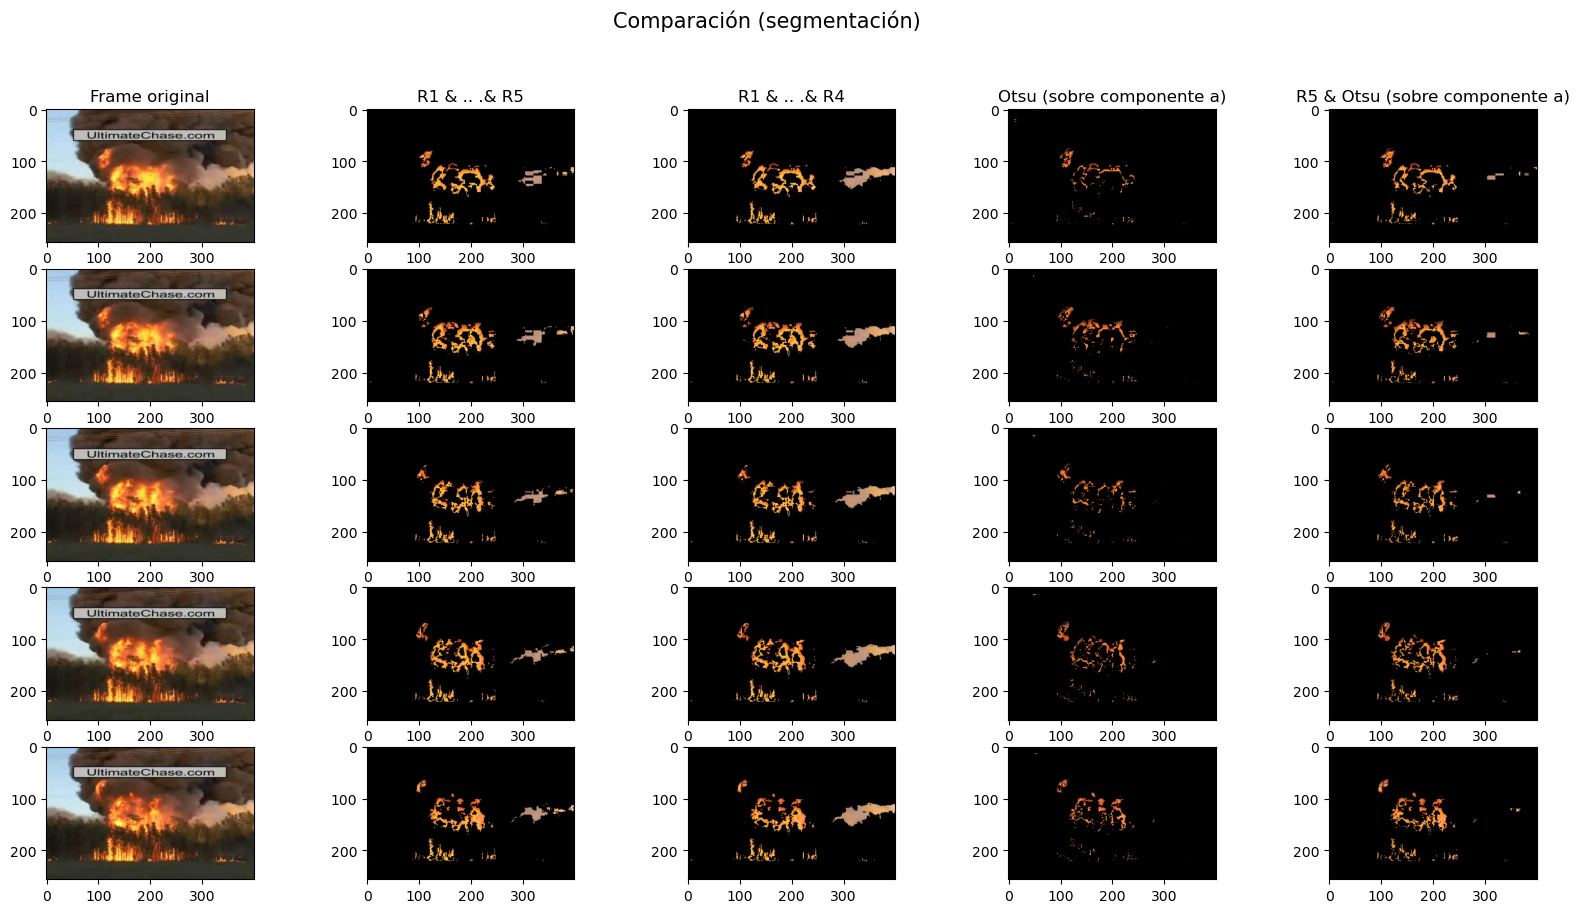

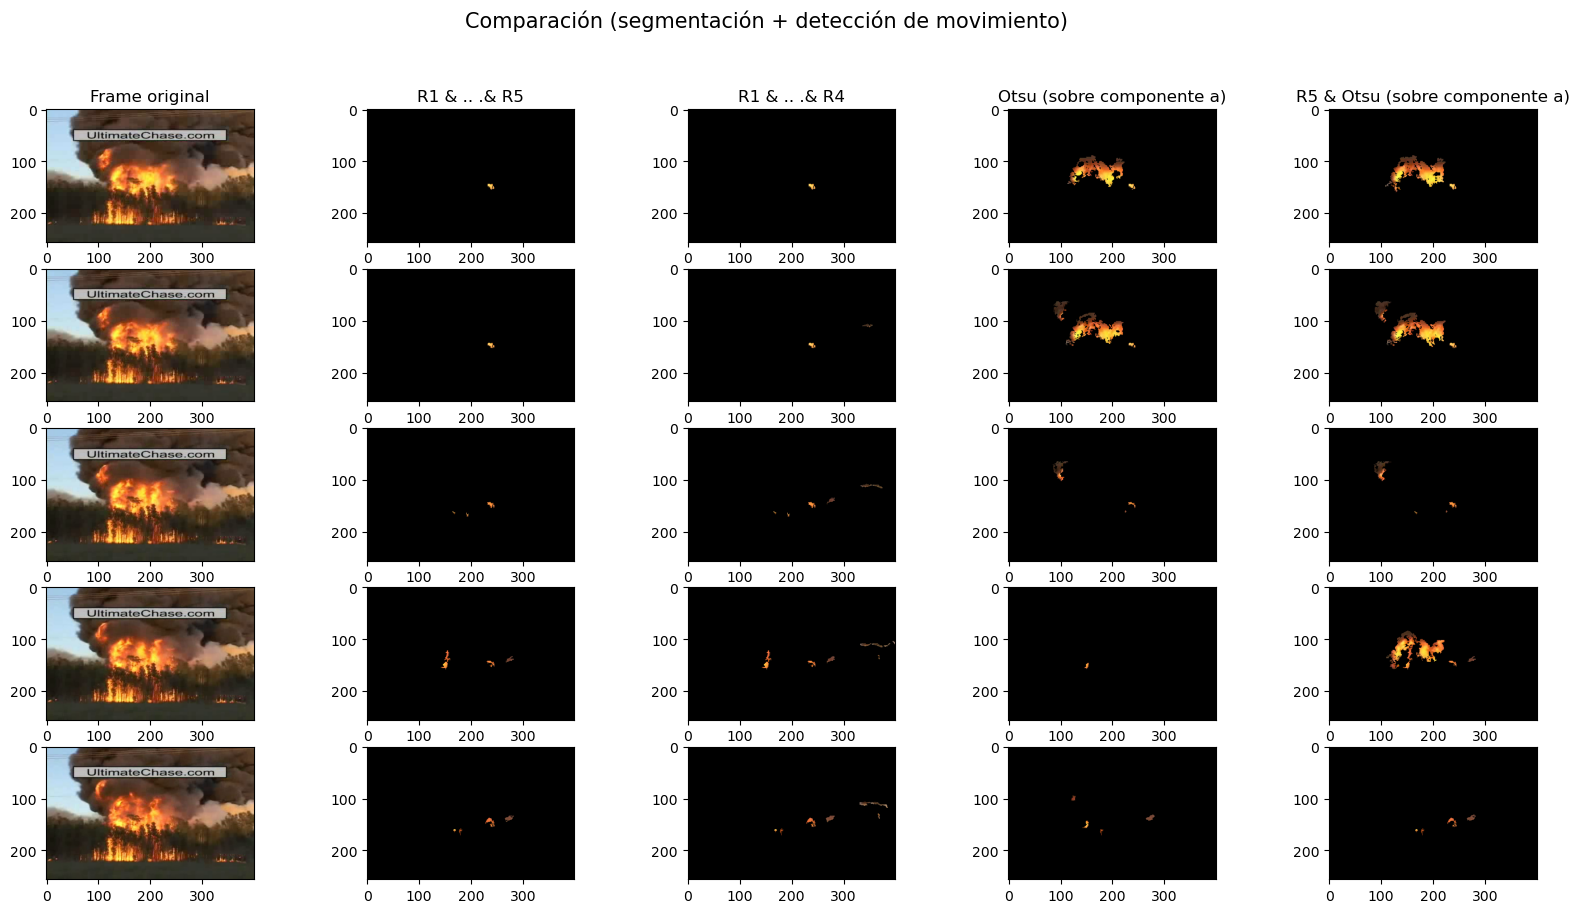

In [23]:
comparar_segmentacion_deteccion("videos5fps/forest2.avi")

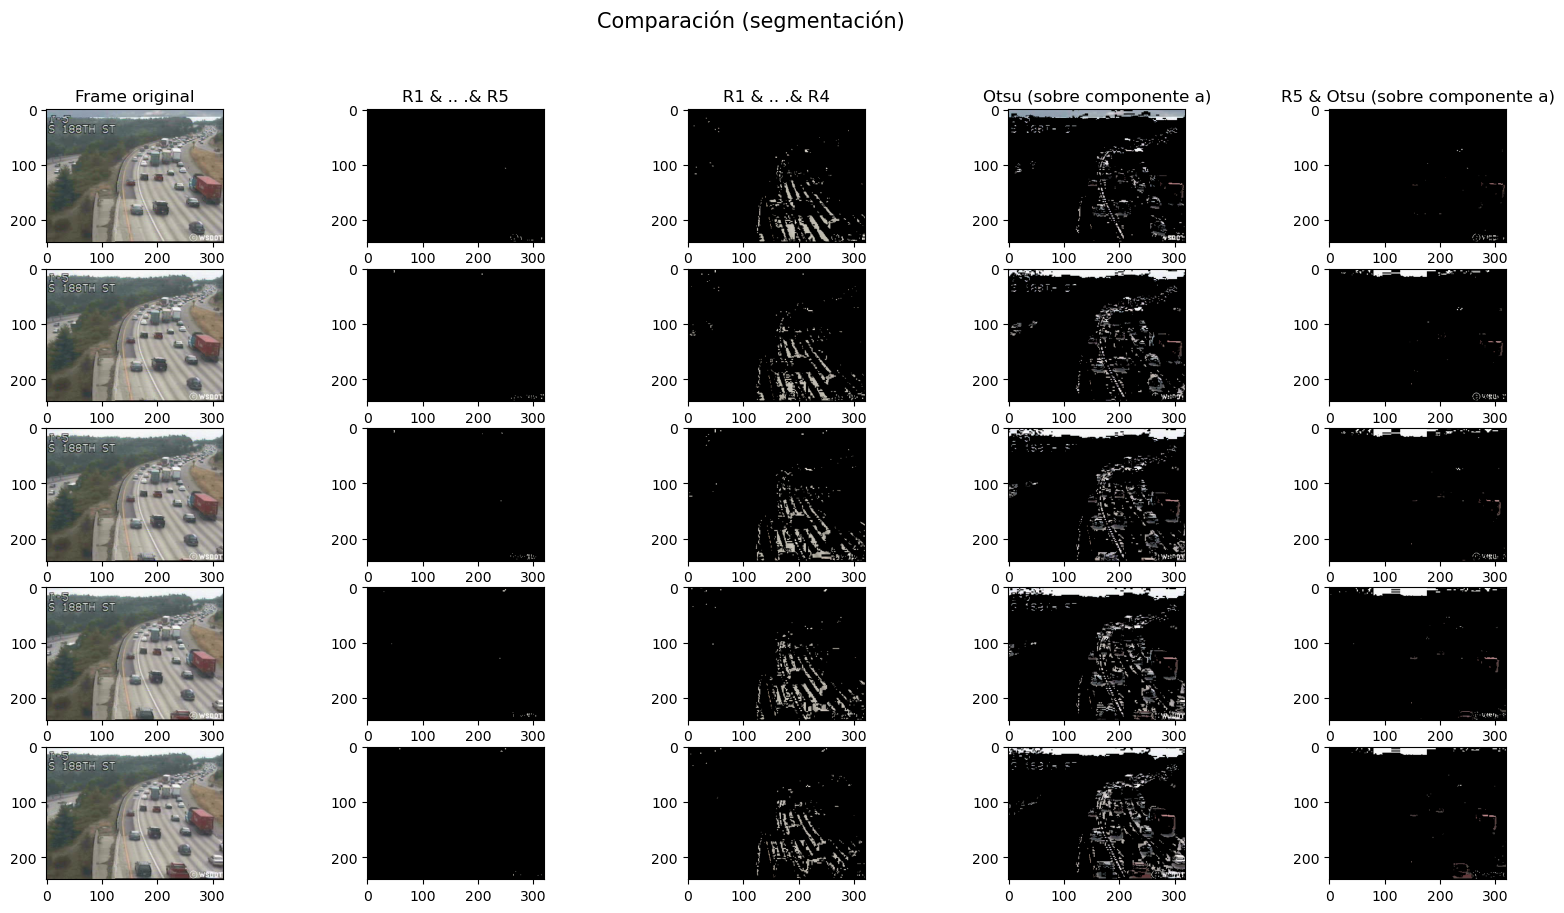

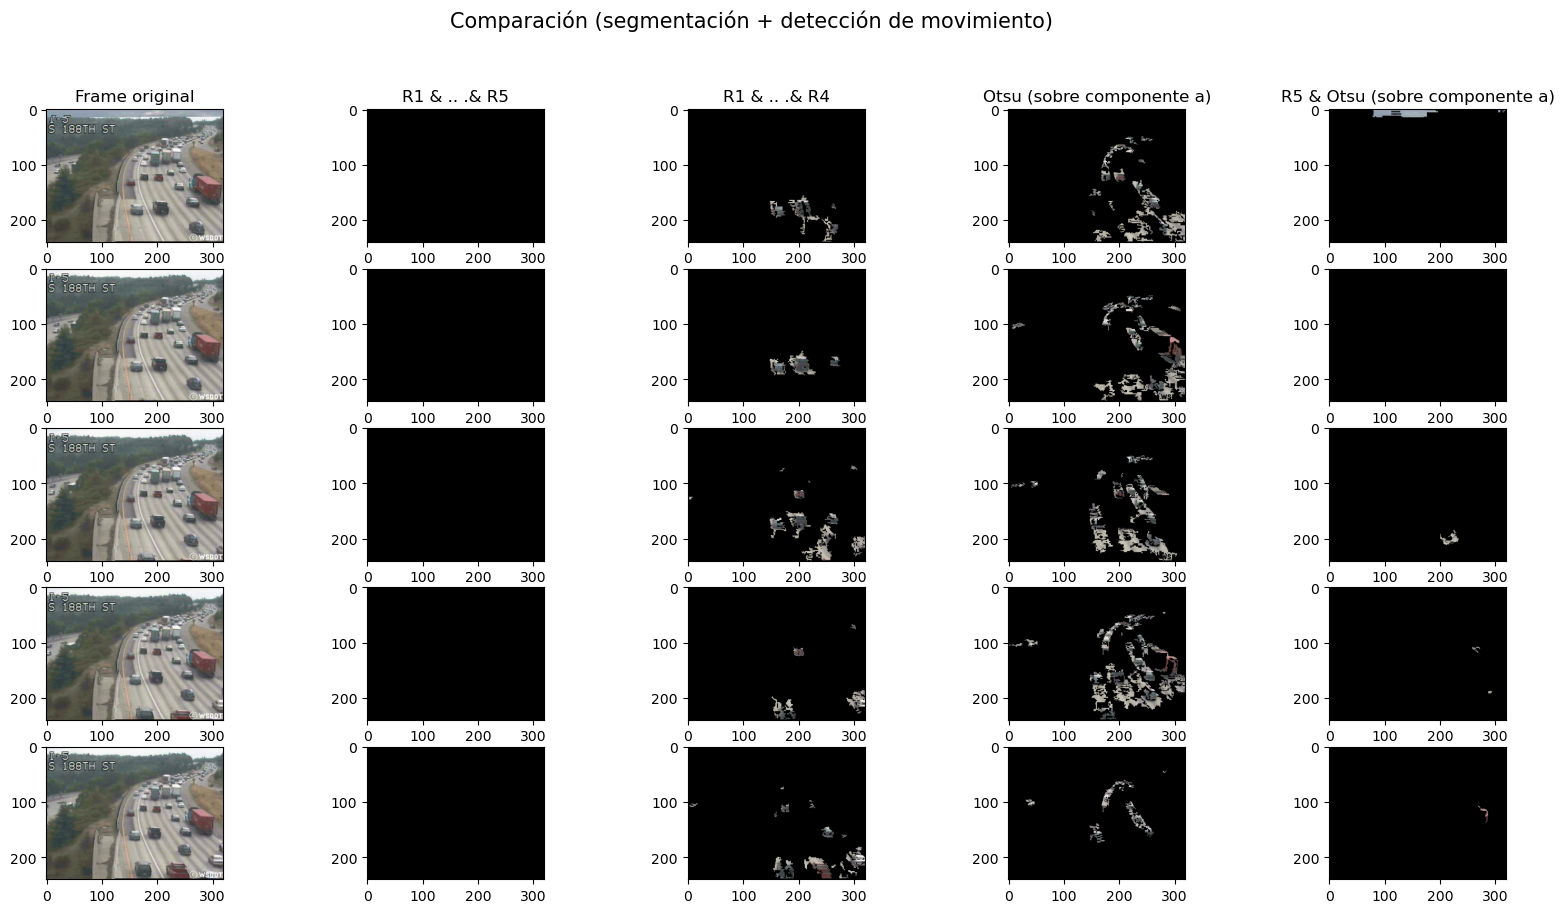

In [25]:
comparar_segmentacion_deteccion("videos5fps/non-fire-1.avi")